# Qiskit

QLauncher is compatible with qiskit backends and features many qiskit-based algorithms.

Let's start by defining a problem to be solved, we will use Exact Cover in this tutorial.

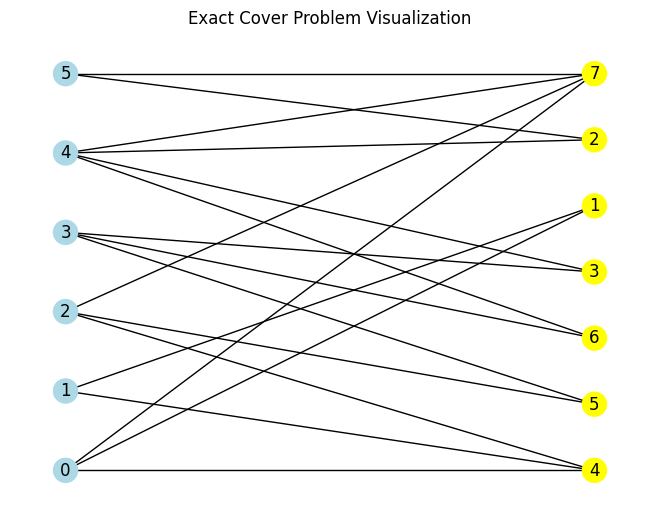

In [1]:
from qlauncher.problems import EC

pr = EC.from_preset("default")
pr.visualize()

## Quantum Approximate Optimization Algorithm

Algorithm we're going to use is Quantum Approximate Optimization Algorithm (QAOA), let's initialize it!

In [2]:
from qlauncher.routines.qiskit import QAOA

alg = QAOA()

Now we need to define the backend our algorithm will run on, you can use a local simulator or a real quantum computer if you have access to one, for now let's stick to the simulator.

In [3]:
from qlauncher.routines.qiskit import QiskitBackend

backend = QiskitBackend('local_simulator')

Now we can use QLauncher to launch QAOA on the selected backend.

In [4]:
from qlauncher.launcher import QLauncher

launcher = QLauncher(pr, alg, backend)
result = launcher.run(onehot="exact")
result

Result(bitstring=101010, energy=2.1142578125)

Be careful! QAOA returns reversed bitstring!

The results correspond to the following matching:

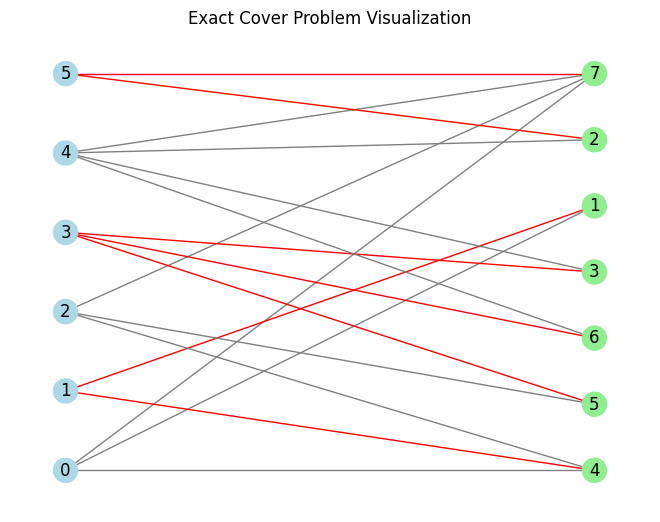

In [5]:
pr.visualize(result.best_bitstring[::-1])

as you can see QAOA solved this problem with flying colors.

QLauncher allows you to easily test different combinations of problems, algorithms and backend simply by swapping out the arguments, let's try out the Max Cut Problem:

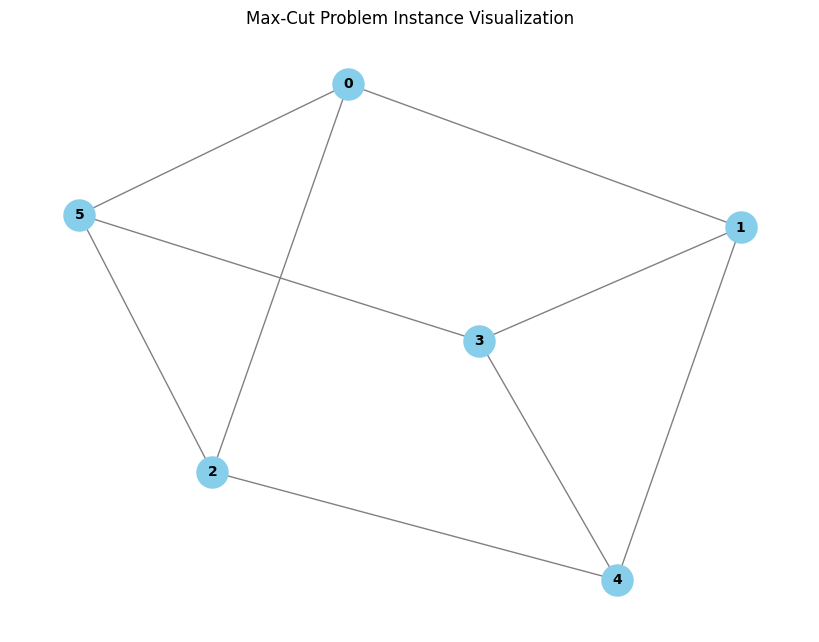

In [6]:
from qlauncher.problems import MaxCut

pr = MaxCut.from_preset("default")
pr.visualize()

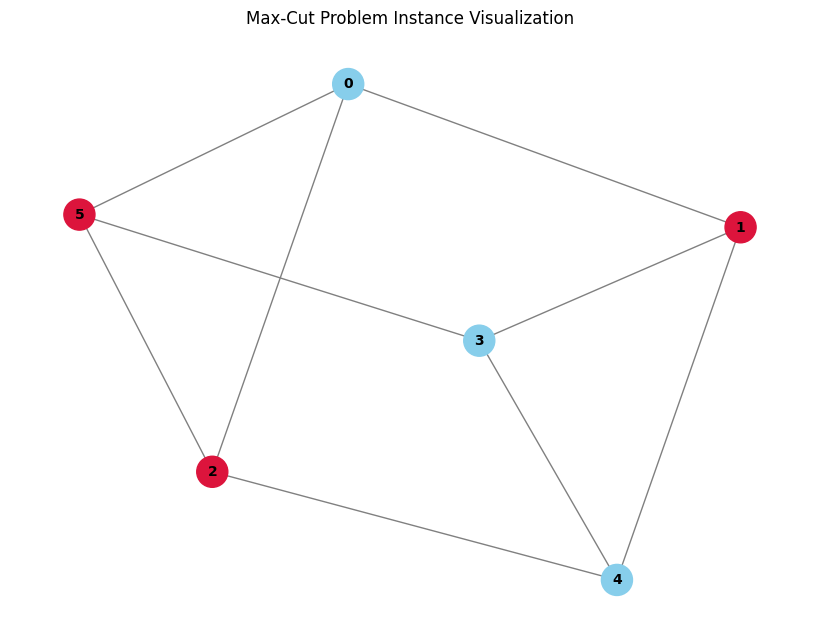

In [7]:
launcher = QLauncher(pr, alg, backend)
result = launcher.run()
pr.visualize(result.best_bitstring)

## AQT Backend

If you have access to one of the AQT quantum computers you can use it as a backend instead of a qiskit simulator. To do that you need to import AQTBackend and pass 'device' as a name together with your access token at object initialization.

Alternatively you can pass a path to the .env file containing you token.

There rest looks identically to using a regular qiskit backend, you can use all the problems and compatible algorithms.